Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
    Unnamed: 0                                          Job Title  \
0            0  Data Analyst, Center on Immigration and Justic...   
1            1                               Quality Data Analyst   
2            2  Senior Data Analyst, Insights & Analytics Team...   
3            3                                       Data Analyst   
4            4                             Reporting Data Analyst   
5            5                                       Data Analyst   
6            6                       Business/Data Analyst (FP&A)   
7            7                               Data Science Analyst   
8            8                                       Data Analyst   
9            9                      Data Analyst, Merchant Health   
10          10                                       Data Analyst   
11          11                             

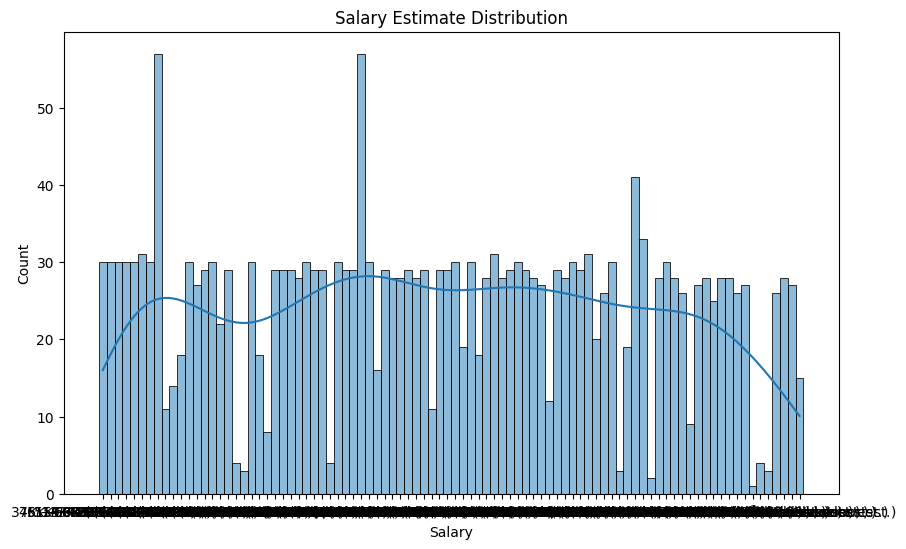

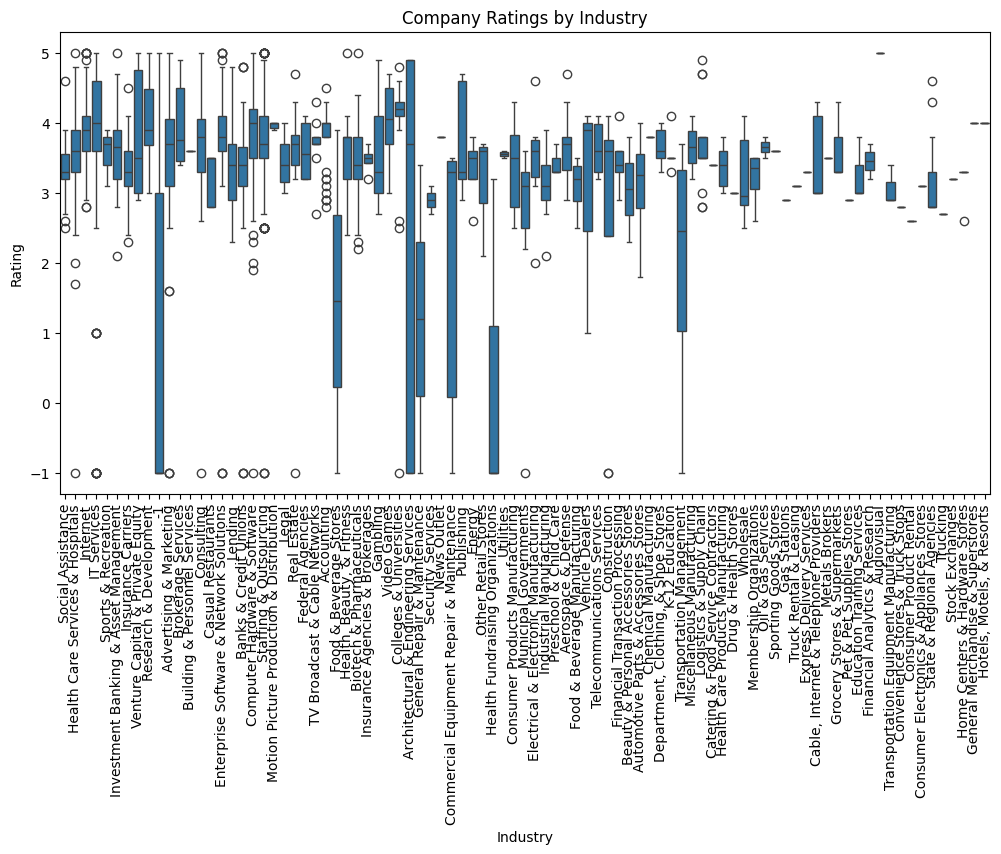

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64


<ipython-input-12-94c75849e42a>:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Rating'].fillna(data['Rating'].median(), inplace=True)
<ipython-input-12-94c75849e42a>:40: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[categorical_cols] = data[categorical_cols].fillna(method='ffill')


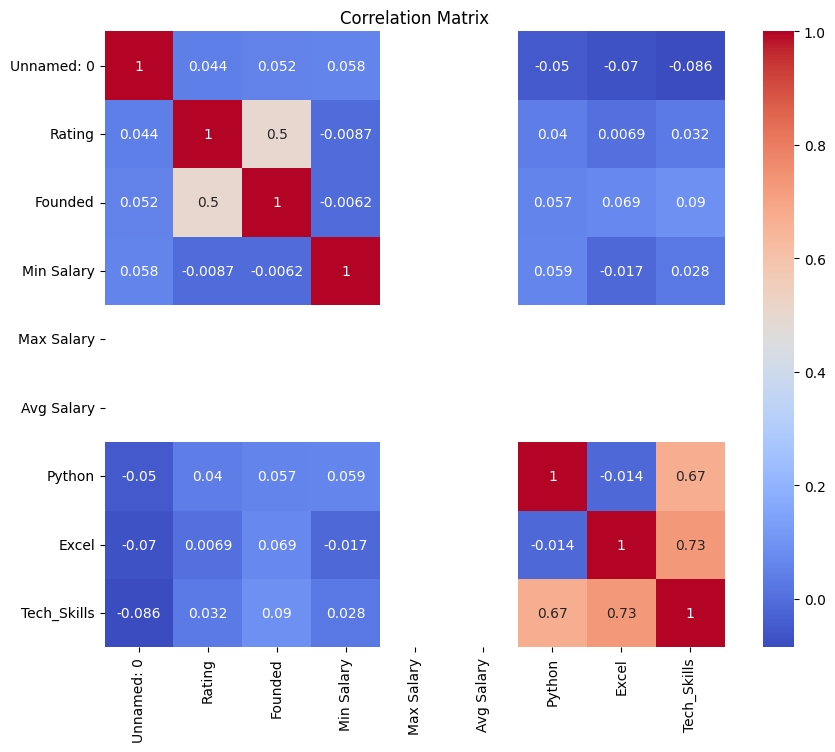

<ipython-input-12-94c75849e42a>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])  # Convert to numeric


MAE: 0.0003744060817231549, R2 Score: 0.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.7 MB/s eta 0:00:00


2025-02-15 12:23:38.950 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-15 12:23:39.078 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-02-15 12:23:39.089 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-15 12:23:39.092 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-15 12:23:39.098 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-15 12:23:39.100 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-15 12:23:39.103 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-15 12:23:39.105 Thread 'MainThread': mi

In [12]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/DataAnalyst.csv")
# Inspect the dataset
print(data.head(20))
print(data.tail(10))
print(data.info())
# Check for duplicates
print(f"Duplicate rows: {data.duplicated().sum()}")
 # General statistics
print(data.describe(include='all'))
# Value counts for categorical columns
for col in ['Job Title', 'Type of ownership', 'Industry',
 'Sector']:
    print(data[col].value_counts().head())
import matplotlib.pyplot as plt
import seaborn as sns
 # Salary distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Salary Estimate'], kde=True, bins=20)
plt.title("Salary Estimate Distribution")
plt.xlabel("Salary")
plt.show()
plt.figure(figsize=(12, 6))
sns.boxplot(x='Industry', y='Rating', data=data)
plt.xticks(rotation=90)
plt.title("Company Ratings by Industry")
plt.show()
# Check missing values
print(data.isnull().sum())
# Fill missing numerical values
data['Rating'].fillna(data['Rating'].median(), inplace=True)
# Drop columns with > 30% missing data
threshold = len(data) * 0.3
data = data.dropna(thresh=threshold, axis=1)
# Forward-fill categorical values
categorical_cols = ['Company Name', 'Industry', 'Sector','Type of ownership']
data[categorical_cols] = data[categorical_cols].fillna(method='ffill')
# Extract minimum salary
data['Min Salary'] = data['Salary Estimate'].str.extract(r'(\d+)').astype(float)
# Extract maximum salary
data['Max Salary'] = data['Salary Estimate'].str.extract(r'-\s*(\d+)').astype(float)
# Compute average salary
data['Avg Salary'] = (data['Min Salary'] + data['Max Salary']) / 2
# Drop old salary column
data.drop('Salary Estimate', axis=1, inplace=True)
 # Extract keywords from Job Description
data['Python'] = data['Job Description'].str.contains('Python',case=False, na=False).astype(int)
data['Excel'] = data['Job Description'].str.contains('Excel',case=False, na=False).astype(int)
# Create a tech skills score
data['Tech_Skills'] = data['Python'] + data['Excel']
# Extract city and state from location
data['City'] = data['Location'].str.split(',', expand=True)[0]
data['State'] = data['Location'].str.split(',', expand=True)[1]
# Correlation matrix
plt.figure(figsize=(10, 8))
numeric_data = data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()
from sklearn.model_selection import train_test_split
# Define features and target
features = ['Rating', 'Tech_Skills', 'Size', 'Founded']
X = data[features]
y = data['Avg Salary']
# Convert categorical columns to numeric using Label Encoding
label_encoders = {}  # Store encoders for later use
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])  # Convert to numeric
    label_encoders[col] = le  # Save encoder for future inverse transform if needed

# Handle missing values
X = X.fillna(0)
y = y.fillna(0)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
# Train model
model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train, y_train)
# Predict
y_pred = model.predict(X_test)
# Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}, R2 Score: {r2}")
!pip install streamlit
!streamlit run app.py &>/dev/null&
import streamlit as st
st.title("Data Analyst Job Analysis")
st.write("Average Salary Prediction")
# User input
rating = st.slider("Company Rating", 1, 5, 3)
tech_skills = st.slider("Tech Skills Score", 0, 2, 1)
size = st.selectbox("Company Size", [0, 1, 2])
founded = st.number_input("Year Founded", min_value=1900,
max_value=2023, value=2000)
# Predict
prediction = model.predict([[rating, tech_skills, size,founded]])
st.write(f"Predicted Salary: ${prediction[0]:,.2f}")